In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('/content/customer_segmentation.csv')

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
data.isnull().sum().sum()

np.int64(24)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum().sum()

np.int64(0)

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
data['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [ ]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],dayfirst = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [ ]:
data['Age'] = 2025-data['Year_Birth']

In [ ]:
data['Age']

,Age
0,68
1,71
2,60
3,41
4,44
...,...
2235,58
2236,79
2237,44
2238,69


In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [ ]:
data['Total_Children'] = data['Kidhome']+data['Teenhome']

In [ ]:
data['Total_Children']

,Total_Children
0,0
1,2
2,0
3,1
4,1
...,...
2235,1
2236,3
2237,0
2238,1


In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [ ]:
data.shape

(2216, 31)

In [ ]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [ ]:
data["Total_Spending"] = data[spend_cols].sum(axis = 1)

In [ ]:
data['Total_Spending']

,Total_Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [ ]:
data['Customer_Since'] = (pd.Timestamp('now')-data['Dt_Customer']).dt.days

In [ ]:
data['Customer_Since']

,Customer_Since
0,4851
1,4301
2,4500
3,4327
4,4349
...,...
2235,4569
2236,4207
2237,4343
2238,4344


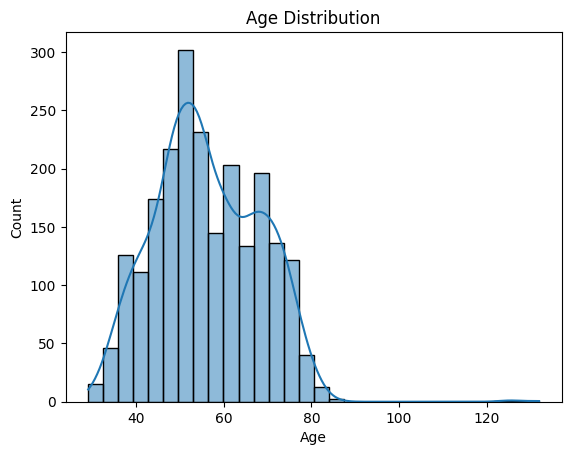

In [ ]:
sns.histplot(data['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

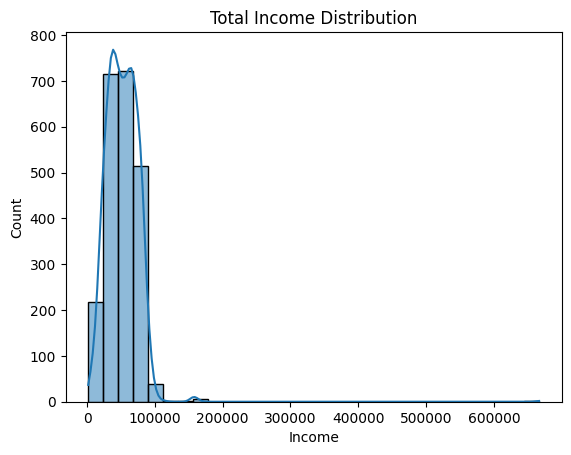

In [ ]:
sns.histplot(data['Income'],bins=30,kde=True)
plt.title('Total Income Distribution')
plt.show()

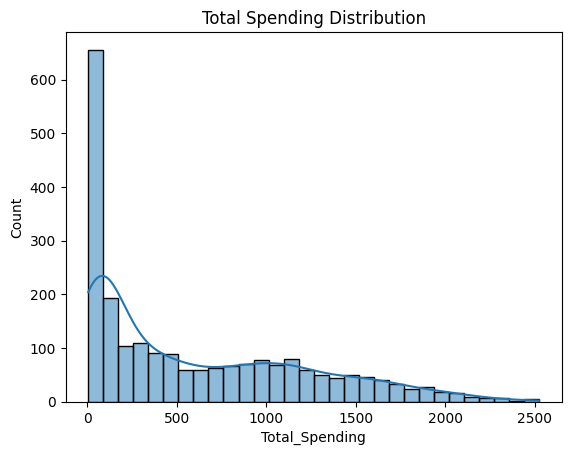

In [ ]:
sns.histplot(data['Total_Spending'],bins=30,kde=True)
plt.title('Total Spending Distribution')
plt.show()

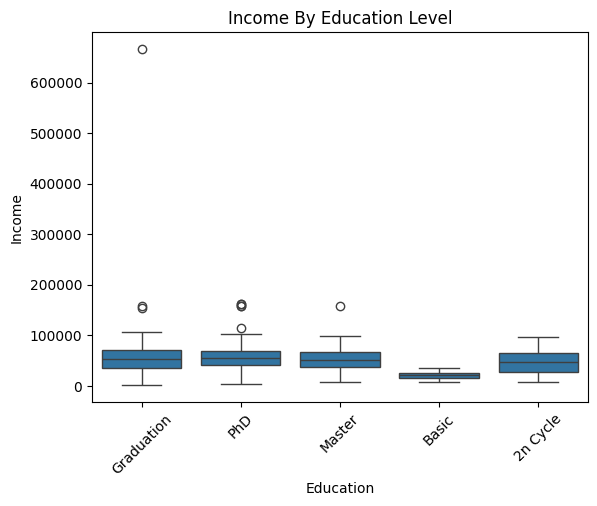

In [ ]:
sns.boxplot(x ='Education',y='Income',data=data)
plt.xticks(rotation=45)
plt.title('Income By Education Level')
plt.show()

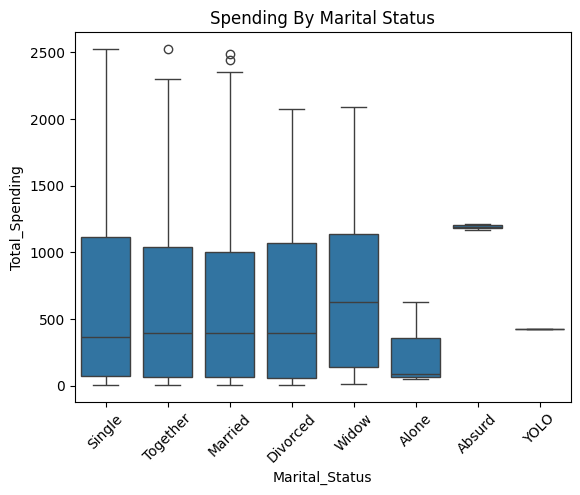

In [ ]:
sns.boxplot(x ='Marital_Status',y='Total_Spending',data=data)
plt.xticks(rotation=45)
plt.title('Spending By Marital Status')
plt.show()

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [ ]:
corr = data[['Income','Age','Recency','Total_Spending','NumWebPurchases','NumStorePurchases']].corr()

In [ ]:
corr.head()

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240


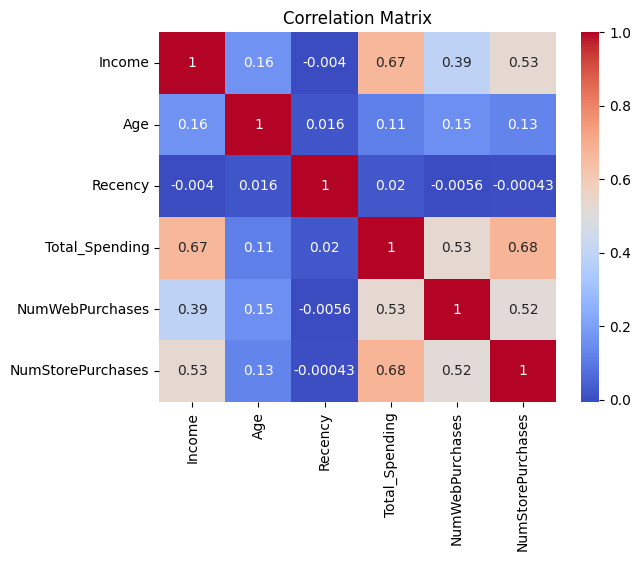

In [ ]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
pivot_income = data.pivot_table(index='Education',columns='Marital_Status',values='Income',aggfunc='mean')

In [ ]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


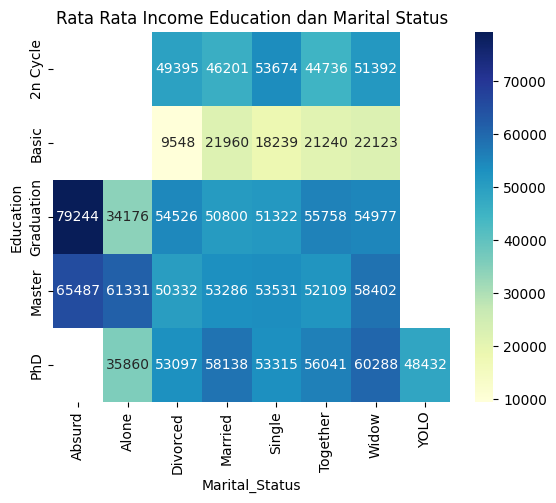

In [ ]:
sns.heatmap(pivot_income, annot=True ,fmt='.0f',cmap='YlGnBu')
plt.title('Rata Rata Income Education dan Marital Status')
plt.show()

In [ ]:
group1 = data.groupby('Education')['Total_Spending'].mean().sort_values(ascending=False)

In [ ]:
group1

,Total_Spending
Education,
PhD,676.733888
Graduation,621.686380
Master,609.767123
2n Cycle,494.930000
Basic,81.796296


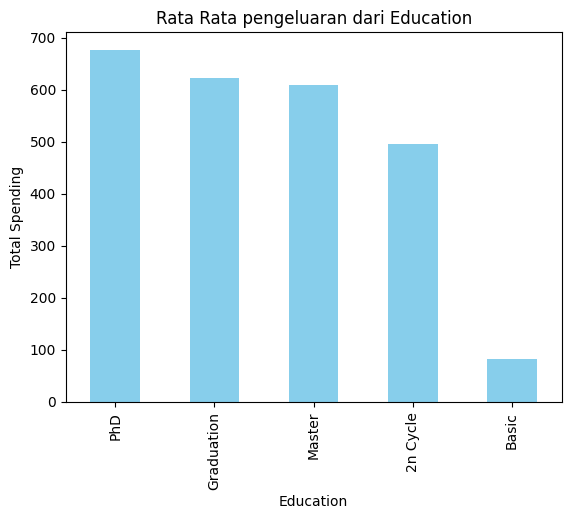

In [ ]:
group1.plot(kind='bar',color='skyblue')
plt.title('Rata Rata pengeluaran dari Education')
plt.xlabel('Education')
plt.ylabel('Total Spending')
plt.show()

In [ ]:
data['AcceptedAny'] = data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

In [ ]:
data['AcceptedAny'].unique()

array([1, 0, 3, 2, 4, 5])

In [ ]:
data['AcceptedAny'] = data['AcceptedAny'].apply(lambda x:1 if x>=1 else 0)

In [ ]:
data['AcceptedAny'].unique()

array([1, 0])

In [ ]:
group2 = data.groupby('Marital_Status')['AcceptedAny'].mean().sort_values(ascending=False)

In [ ]:
group2

,AcceptedAny
Marital_Status,
Absurd,0.500000
YOLO,0.500000
Widow,0.342105
Alone,0.333333
Single,0.312102
Divorced,0.297414
Married,0.252042
Together,0.251309


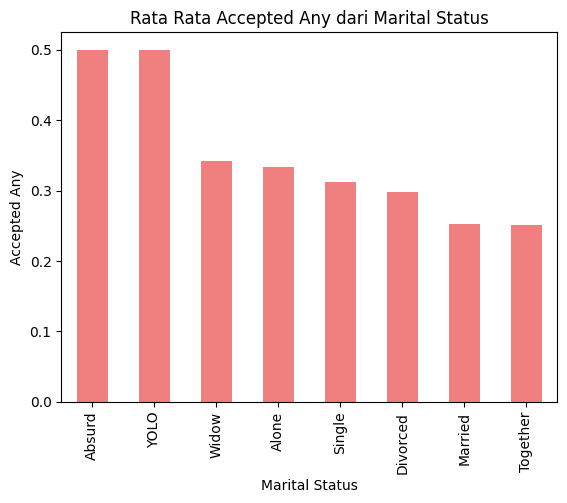

In [ ]:
group2.plot(kind='bar',color='lightcoral')
plt.title('Rata Rata Accepted Any dari Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Accepted Any')
plt.show()

In [ ]:
bins = [18,30,40,50,60,70,90]

In [ ]:
labels = ['18-29','30-39','40-49','50-59','60-69','70+']

In [ ]:
data['AgeGroup'] = pd.cut(data['Age'],bins=bins,labels=labels)

In [ ]:
data['AgeGroup']

,AgeGroup
0,60-69
1,70+
2,50-59
3,40-49
4,40-49
...,...
2235,50-59
2236,70+
2237,40-49
2238,60-69


In [ ]:
group3 = data.groupby('AgeGroup')['Income'].mean()

/tmp/ipython-input-1792840121.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = data.groupby('AgeGroup')['Income'].mean()


In [ ]:
group3

,Income
AgeGroup,
18-29,46658.000000
30-39,46283.028302
40-49,49224.877034
50-59,50812.913303
60-69,56200.827887
70+,58944.316294


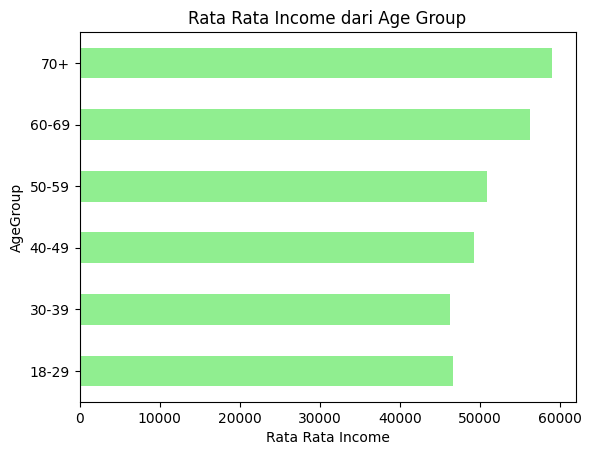

In [ ]:
group3.plot(kind='barh',color='lightgreen')
plt.title('Rata Rata Income dari Age Group')
plt.xlabel('Rata Rata Income')
plt.show()

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,4851,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,4301,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,4500,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,4327,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,4349,0,40-49


In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [ ]:
features = ['Age','Income','Total_Children','Total_Spending','NumWebPurchases','NumWebVisitsMonth','Recency']

In [ ]:
X = data[features].copy()

In [ ]:
X

,Age,Income,Total_Children,Total_Spending,NumWebPurchases,NumWebVisitsMonth,Recency
0,68,58138.0,0,1617,8,7,58
1,71,46344.0,2,27,1,5,38
2,60,71613.0,0,776,8,4,26
3,41,26646.0,1,53,2,6,26
4,44,58293.0,1,422,5,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1,1341,9,5,46
2236,79,64014.0,3,444,8,7,56
2237,44,56981.0,0,1241,2,6,91
2238,69,69245.0,1,843,6,3,8


Preprocesing

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 0.98644293,  0.2340627 , -1.26480327, ...,  1.42855332,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948,  1.40580564, ..., -1.12588116,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764, -1.26480327, ...,  1.42855332,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052, -1.26480327, ..., -0.76096195,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.07050118, ...,  0.6987149 ,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453,  1.40580564, ..., -0.39604274,
         0.69323197, -0.31140528]])

Kmeans Algoriitma Unsupervised Learning

In [145]:
wcss = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


In [146]:
wcss

[10972.032496889604,
 9947.22723494101,
 8638.87298306658,
 8070.0326300379775,
 7467.113862396736,
 7027.492009852385,
 6682.6939912803045,
 6393.079759597089]

Elbow Method

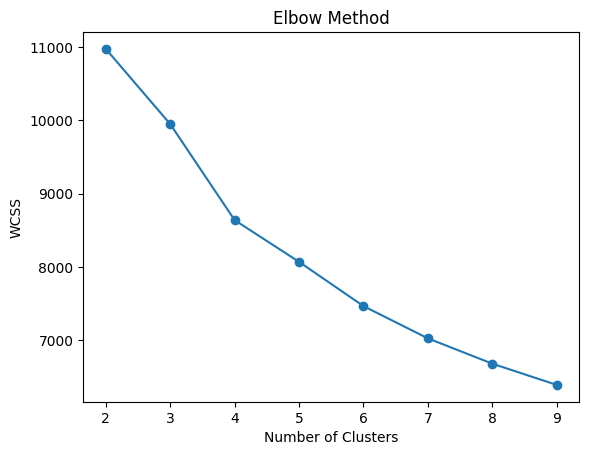

In [147]:
plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [148]:
Kmeans = KMeans(n_clusters=6)
data['Cluster'] = Kmeans.fit_predict(X_scaled)

In [149]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4851,1,60-69,5
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4301,0,70+,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4500,0,50-59,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4327,0,40-49,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4349,0,40-49,3


In [151]:
cluster_summary = data.groupby('Cluster')[features].mean()

In [152]:
cluster_summary

,Age,Income,Total_Children,Total_Spending,NumWebPurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,65.082707,59915.515038,0.781955,682.255639,4.842105,4.500000,18.383459
1,46.552632,28749.266917,0.836466,96.616541,2.067669,7.000000,44.328947
2,55.171429,80693.128571,0.069048,1428.640476,4.409524,2.123810,52.823810
3,60.273649,51485.763514,0.966216,460.405405,3.824324,5.047297,77.689189
4,59.856383,40452.460106,2.114362,132.375000,2.343085,6.414894,48.667553
5,57.966258,61983.886503,1.030675,1000.972393,8.588957,6.343558,51.098160


In [153]:
data['Cluster'].value_counts()

,count
Cluster,
1,532
2,420
4,376
5,326
3,296
0,266


In [159]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

In [160]:
X_pca

array([[ 1.80743203,  0.96244454],
       [-1.333224  ,  0.93168348],
       [ 1.76089089,  0.10126567],
       ...,
       [ 0.63846782, -1.41999101],
       [ 1.29889673,  0.77641425],
       [-1.18016681,  1.50331053]])

In [162]:
data['PCA2']

,PCA2
0,0.962445
1,0.931683
2,0.101266
3,-1.288845
4,-0.394798
...,...
2235,0.951503
2236,3.531036
2237,-1.419991
2238,0.776414


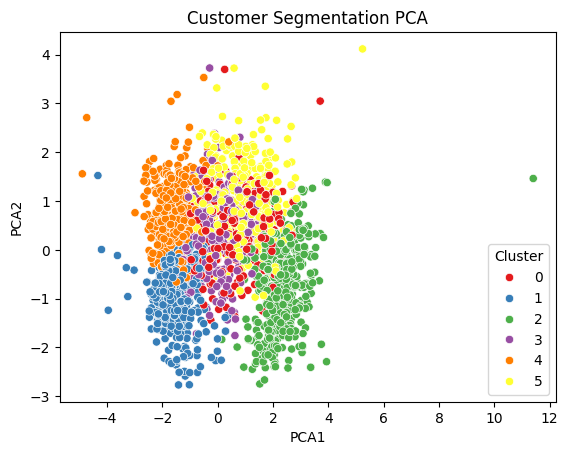

In [166]:
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segmentation PCA')
plt.show()

In [167]:
cluster_summary

,Age,Income,Total_Children,Total_Spending,NumWebPurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,65.082707,59915.515038,0.781955,682.255639,4.842105,4.500000,18.383459
1,46.552632,28749.266917,0.836466,96.616541,2.067669,7.000000,44.328947
2,55.171429,80693.128571,0.069048,1428.640476,4.409524,2.123810,52.823810
3,60.273649,51485.763514,0.966216,460.405405,3.824324,5.047297,77.689189
4,59.856383,40452.460106,2.114362,132.375000,2.343085,6.414894,48.667553
5,57.966258,61983.886503,1.030675,1000.972393,8.588957,6.343558,51.098160


In [169]:
import joblib
joblib.dump(Kmeans,'Kmeans_model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']